# Python for (open) Neuroscience

_Lecture 1.0_ - Introduction to `numpy`

Luigi Petrucco

Jean-Charles Mariani

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/vigji/python-cimec/blob/main/lectures/Lecture1.0_Numpy-intro.ipynb)

## A note on searching info

Google every doubt that you have! [stackoverflow](https://stackoverflow.com) is a great source of information

For simple doubts and introductory explanations on `numpy` ChatGPT can be an excellent source! 

## Working with libraries (/packages/modules)

We can import external libraries using `import`:

In [1]:
import numpy
numpy.array

<function numpy.array>

We can give aliases to the library we import for the sake of brevity:

In [2]:
import numpy as np
np.array

<function numpy.array>

We can also import specific functions (or classes) from a library with this syntax:

In [3]:
from numpy import array
array

<function numpy.array>

## The `numpy` library

High performance number crunching with Python 

C-compiled libraries make it very efficient

In [6]:
N_ELEMENTS = 1000000

In [7]:
%%timeit
a_list = list(range(N_ELEMENTS))
mean = sum(a_list) / len(a_list)  # mean

mean_subtracted = [element - mean for element in a_list]  # subtract mean

47.4 ms ± 345 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [9]:
import numpy as np

In [10]:

%%timeit
an_array = np.arange(N_ELEMENTS)
mean = np.mean(an_array)  # mean

mean_subtracted = an_array - mean  # subtract mean

1.86 ms ± 30.2 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


### A small note on credit & citations

Many forget to do so, but remember: there's scientists behind many open-source tools, and citations are the way we can reward them in academic currency!

    Harris, C.R., Millman, K.J., van der Walt, S.J. et al. Array programming with NumPy. Nature 585, 357–362 (2020). DOI: 10.1038/s41586-020-2649-2

Let's import the library!

In [11]:
import numpy as np

## `np.ndarray`

Data type representing N-dimensional arrays

Workhorse of scientific computing!

A note on language: when we say `array` we do not imply any number of dimensions:
- <span style="color:indianred">vectors</span> will be 1D arrays
- <span style="color:indianred">matrices</span> will be 2D arrays
- for an array with n_dims>2, I will use <span style="color:indianred">n-dimensional matrix</span>, or <span style="color:indianred">stack</span> (if we talk about imaging data/other kind of stacked data); some people might call it <span style="color:indianred">tensor</span>

Related note: there is a `np.matrix` class in `numpy`, but you **should not** use it; it has not been adopted much and  it might be removed soon!

`np.ndarray` is a powerful data storing structure:

- it addresses memory allocation efficiency issues

- it gives powerful indexing functionalities

- implements vectors/matrices algebric operations

## creating arrays

### Initialize empty arrays

We can create a simple array of zeros using the `np.zeros` function, and passing it:


A single integer n to create a 1D vector of length n:

In [12]:
np.zeros(3)  # we pass a single integer for a 1D array

array([0., 0., 0.])

A tuple of numbers indicating the size for every dimension for more dimensions

In [13]:
np.zeros((3,2))  # we pass the tuple (3, 2) to have a 3 x 2 matrix

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

The `np.ones` function works in the same way but creates a matrix of ones:

In [14]:
np.ones((3,2))

array([[1., 1.],
       [1., 1.],
       [1., 1.]])

We can inizialize a matrix with arbitrary values using `np.full`:

In [16]:
np.full((2,3), 20)

array([[20, 20, 20],
       [20, 20, 20]])

In numpy arrays, **all elements must be of the same type**! (This is important to make arrays efficient)

By default, `np.nparray`s will be initialized with `float` values:

In [17]:
np.ones((2,3))

array([[1., 1., 1.],
       [1., 1., 1.]])

To specify the data type of our array, we can pass the `dtype` argument (for data type). For example, we can make it `int`:

In [18]:
np.ones((2,3), dtype=int)

array([[1, 1, 1],
       [1, 1, 1]])

To change the data type of an existing array, we can use the `.asdtype(new_type)` method:

In [26]:
my_arr = np.full((2,3), 1)
my_arr.astype(int)

array([[1, 1, 1],
       [1, 1, 1]])

We can also use some special data type from numpy, for memory saving purposes:
 - `np.uint8` (numbers from 0 to 255)
 - `np.int8` (numbers from -128 to 127)
 - `np.uint16` (numbers from 0 to 65535)
 - `np.int16` (numbers from -32768 to 32767)
 
The number (8 or 16) represents the number of **bits** used for every entry in the array!

In [30]:
import sys
a_python_int_array = np.ones((200, 300), dtype=int)

sys.getsizeof(a_python_int_array)  # we ask for the size of the array in memory

480120

In [29]:
a_uint8_array = np.ones((200, 300), dtype=np.uint8)

sys.getsizeof(a_uint8_array)  # the np.uint8 type is much more efficient!

60120

We can also make arrays of text! in this case, the dtype will be `'<U[n]'` (U for Unicode, and n will be the number of characters in the longest entry in the matrix):

In [149]:
txt = np.full((300,2000), "some text")

txt  # look at the dtype! the number will be the number of characters:

array([['some text', 'some text', 'some text', ..., 'some text',
        'some text', 'some text'],
       ['some text', 'some text', 'some text', ..., 'some text',
        'some text', 'some text'],
       ['some text', 'some text', 'some text', ..., 'some text',
        'some text', 'some text'],
       ...,
       ['some text', 'some text', 'some text', ..., 'some text',
        'some text', 'some text'],
       ['some text', 'some text', 'some text', ..., 'some text',
        'some text', 'some text'],
       ['some text', 'some text', 'some text', ..., 'some text',
        'some text', 'some text']], dtype='<U9')

### Useful attributes of `np.ndarray` objects

Being objects, `np.ndarray`s have attributes that can be useful to check out their properties.

### `.shape`

The `.shape` attribute gives us the shape (the number of elements along each dimension of the array):

In [37]:
my_array = np.zeros((4,3))

my_array.shape

(4, 3)

### `.dtype`

The `.dtype` attribute gives the type of the elements in the array:

In [40]:
my_array = np.full((4,3,5), "a string")
my_array.dtype

dtype('<U8')

### `.size`

Do not confuse `.shape` with `.size`! `.size` gives the numbers of elements in the whole matrix:

In [41]:
my_array = np.full((4,3), 3)
my_array.size

12

### Convert lists to arrays

One way of creating an array is to convert an existing list into an array with the `np.array()` function:

In [45]:
my_list = [1,2,3,4]
np.array(my_list).shape

(4,)

Converting lists of lists will add more dimensions:

In [147]:
my_list = [[1,2,3,4], [2,3,4,5]]
np.array(my_list)

array([[1, 2, 3, 4],
       [2, 3, 4, 5]])

In [148]:
# Beware! if we initialize the np.ndarray with lists of different lengths, we will create
# an array of lists - with a funny dtype (object), and one dimensional.
# You generally want to avoid it! Luckily, we get a warning:

my_list = [[1,2,3,4], [2,3,4,5], [1,2]]
np.array(my_list)

/var/folders/wp/q156lfy924zg6bqc48v9j2800000gn/T/ipykernel_75548/2500491937.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array(my_list)


array([list([1, 2, 3, 4]), list([2, 3, 4, 5]), list([1, 2])], dtype=object)

### Ordered sequences

We can create ordered sequences of numbers using `np.arange()`:

In [51]:
np.arange(10)  # numbers from 0 to 9

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

We can optionally specify start, end, and step of the sequence (start and steps are optional):

In [53]:
np.arange(1, 10, 2)  # numbers from 1 to 10 in steps of 2:

array([1, 3, 5, 7, 9])

Alternatively, we can use `np.linspace()` to generate `num` equally spaced numbers in a specified range:

In [54]:
np.arange(0, 10, 5)

array([0, 5])

In [55]:
np.linspace(0, 10, num=5)

array([ 0. ,  2.5,  5. ,  7.5, 10. ])

### Random arrays

We can use the `np.random` module to create random arrays. For example:

In [57]:
?np.ones

In [59]:
np.ones((3, 2))

array([[1., 1.],
       [1., 1.],
       [1., 1.]])

In [56]:
np.random.randint(0, 2, (3,2))  # we pass min, max, and desired shape of the random array

array([[1, 0],
       [0, 1],
       [0, 0]])

(Practicals 1.0.0)

## Visualize arrays and matrices

We can visualize arrays and matrices using the `matplotlib.pyplot` library.

In [61]:
from matplotlib import pyplot as plt  # code you'll write many times in Python...

We can plot 1D arrays (or lists!) using `plt.plot()`:

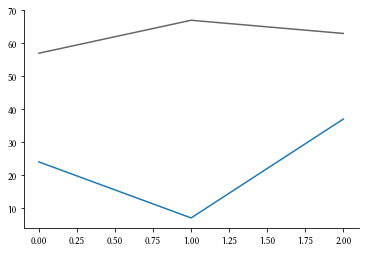

In [63]:
random_vect = np.random.randint(0, 100, (3, 2))
plt.plot(random_vect)

We can visualize 2D matrices with `plt.matshow()`

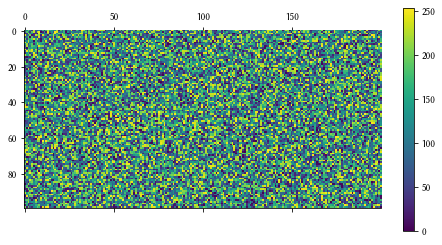

In [65]:
random_mat = np.random.randint(0, 255, (100, 200))

plt.matshow(random_mat)
plt.colorbar()

There's much more to the matplotlib library, we'll discover more things as we go!

## Indexing arrays

We can index ("slice") arrays as we were doing with lists.

For a 1D array:

In [68]:
my_vect = np.arange(0, 10)
print(my_vect[:5])  # first 5
print(my_vect[-3:])  # last 3
print(my_vect[:6:2])  # first 6, one every two

[0 1 2 3 4]
[7 8 9]
[0 2 4]


But! With `np.ndarray`s we have more flexibility than with lists!

### Indexing by index numbers

We can index passing an array (or a list) of the index values that we want to retrieve!

In [75]:
my_vect = np.random.normal(0, 10, 4)
my_vect[[0, 1]]

array([-9.67965322, -4.64530778])

### Boolean indexing

Alternatively, we can use arrays of boolean values (with the same shape of the `np.array`)

In [94]:
my_vect = np.random.normal(0, 10, (10))
thr = 5
boolean_selector = my_vect > thr


my_vect[boolean_selector]  # will select only values above 5

array([ 9.2361528 , 22.67783598, 14.20087893,  6.5768083 ])

### Indexing for multiple dimensions

We can index over multiple dimensions specifying **comma-separated** indexes along each dimension:

In [87]:
my_mat = np.array([[1,   2,  3,  4, 5],
                   [6,   7,  8,  9, 10],
                   [11, 12, 13, 14, 15]])

my_mat[2, :] 

my_mat[2]  # the same as writing my_mat[2, :], but discouraged!

array([11, 12, 13, 14, 15])

We can use boolean selectors for an axis, as long as the dimension matches:

In [88]:
my_mat.shape

(3, 5)

In [92]:
selector = np.array([True, False, False])
my_mat[selector, :]

array([[1, 2, 3, 4, 5]])

In this way, we can check for boolean conditions on the matrix:

In [95]:
my_mat = np.array([[1,   2,  3,  4, 5],
                   [6,   7,  8,  9, 10],
                   [11, 12, 13, 14, 15]])

my_mat[my_mat > 5]

array([ 6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

this will change the shape of the output!

### Mind singleton dimensions!

Arrays can have singleton dimensions - _i.e._ dimensions along which there is a single entry:

In [96]:
my_arr = np.zeros(4)  # this is a 1D array

print(f"{my_arr}; shape: {my_arr.shape}")

[0. 0. 0. 0.]; shape: (4,)


In [99]:
my_arr_1 = np.zeros((1,4))  # this is a 2D array with a singleton dimension!
print(f"{my_arr}; shape: {my_arr.shape}")

[[0. 0. 0. 0.]]; shape: (1, 4)


Sometimes, it can be useful to quickly add a singleton dimension:

In [103]:
my_arr = np.zeros(4)  # 1D array

# With this special indexing, we artificially add a singleton dimension on first dim:
my_arr = my_arr[:, np.newaxis]  

print(f"{my_arr}; shape: {my_arr.shape}")

[[0.]
 [0.]
 [0.]
 [0.]]; shape: (4, 1)


An alternative way of achieving the same with a function is `np.expand_dims()`:

In [104]:
import numpy as np
my_arr = np.zeros(4)  # 1D array

my_arr = np.expand_dims(my_arr, 0)

print(f"{my_arr}; shape: {my_arr.shape}")

[[0. 0. 0. 0.]]; shape: (1, 4)


## array views

Indexing operations return views on the original arrays, NOT COPIES! Changing values in the slice we will also alter the original array!

In [112]:
my_mat = np.array([[1,   2,  3,  4, 5],
                   [6,   7,  8,  9, 10],
                   [11, 12, 13, 14, 15]])

a_slice = my_mat[2, :]

a_slice[0] = 2000  # change the entry unless we use the .copy()


(Practicals 1.0.1)

## Transforming and combining arrays

### `.T`

We can have a transposed view of a matrix with the `.T` attribute (this will reverse the dimensions order if `n_dims>2`):

In [116]:
m = np.ones((3,2))
m_t = m.T

print(m.shape, m_t.shape)

(3, 2) (2, 3)


### `.flatten()`

We can flatten all values of an N-dimensional array into a 1D array with the `.flatten()` syntax. This will make a copy of the array!

In [119]:
m = np.ones((3,2,3))
m_flat = m.flatten()

print(m.shape, m_flat.shape)
m_flat

(3, 2, 3) (18,)


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.])

### `np.concatenate()`

We can concatenate arrays along any dimension by putting them in a list and pass the list to the `np.concatenate()` function:

In [120]:
arr_list = [np.zeros(3), np.ones(3)]

np.concatenate(arr_list) 

array([0., 0., 0., 1., 1., 1.])

By default, we concatenate over the first dimension:

In [122]:
arr_list = [np.zeros((3,2)), np.ones((3,2))]
arr_list

np.concatenate(arr_list)  # if ndims > 1 by default we concatenate over the first dimension

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [1., 1.],
       [1., 1.],
       [1., 1.]])

but we can pass an `axis` argument to change the default behavior:

In [123]:
arr_list = [np.zeros((3,2)), np.ones((3,2))]

np.concatenate(arr_list, axis=1) 

array([[0., 0., 1., 1.],
       [0., 0., 1., 1.],
       [0., 0., 1., 1.]])

### `np.stack()`

We can pile up arrays over a new dimension with  `np.stack()`:

In [127]:
arr_list = [np.zeros((3, 2)), np.ones((3, 2))]

np.stack(arr_list).shape

(2, 3, 2)

## Array operations

We obviously want to do some operations with those arrays!

### Operations with numbers

Operations with arrays are **by default element-wise**!

Sum / subtraction / multiplication / division apply to individual entries of the array:

In [128]:
np.ones(3) + 1

array([2., 2., 2.])

In [129]:
my_arr = np.ones((4,3))
my_arr[0, :] *= 100
my_arr

array([[100., 100., 100.],
       [  1.,   1.,   1.],
       [  1.,   1.,   1.],
       [  1.,   1.,   1.]])

Exponentiation also works element-wise:

In [130]:
np.array((1,2,3))**3

array([ 1,  8, 27])

### Operations between arrays

`numpy` works element-wise also when operating between arrays:

In [131]:
arr_1 = np.array([[1,2],
                  [3,4]])

arr_2 = np.array([[0,0],
                  [0,2]])

arr_1 * arr_2

array([[0, 0],
       [0, 8]])

In [132]:
arr_1 ** arr_2

array([[ 1,  1],
       [ 1, 16]])

Therefore, we normally expect arrays of matching shapes, or we get a `ValueError`!

In [133]:
np.ones((2, 3)) * np.ones((4, 5))

ValueError: operands could not be broadcast together with shapes (2,3) (4,5) 

### Broadcasting

`numpy` has a smart way of dealing with some scenarios of non-matching dimensions, and we should use it!

Can be a bit tricky at the beginning, but it is very important: we can write very efficient and readable code with it!

In [134]:
# Assume we have a matrix of data:
a = np.array([[ 0.0,  0.0,  0.0],
               [10.0, 10.0, 10.0],
               [20.0, 20.0, 20.0],
               [30.0, 30.0, 30.0]])

a.shape

(4, 3)

In [142]:
b = np.array([1.0, 2.0, 3.0])  # we want to add an offset from each column
b + a

array([[ 1.,  2.,  3.],
       [11., 12., 13.],
       [21., 22., 23.],
       [31., 32., 33.]])

### What is happening?

Numpy automatically infer missing values to create arrays of matching shape, where it can the operate element-wise!

![Alt Text](https://numpy.org/doc/stable/_images/broadcasting_2.png)

## How does broadcasting work

When operating on two arrays, NumPy compares their shapes. It starts **with the trailing** (i.e. rightmost) dimension and works its way left. 

Two dimensions are compatible when:

 - they are equal, or
 - one of them is 1.

![Alt Text](https://i0.wp.com/andrewm4894.com/wp-content/uploads/2020/10/Annotation-2020-10-15-133235.jpg?w=486&ssl=1)

In our case:

In [143]:
print(f"shape a: {a.shape}")
print(f"shape b: {b.shape}")

shape a: (4, 3)
shape b: (3,)


Shape b matches shape a over the last dimension, and is propagated over the rest of the dimensions

For example, this operation will not work!

In [146]:
a = np.ones((5,4,3))

b = np.ones((4,3))

Practicals 1.0.2